In [579]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.nn.functional as F


In [580]:
husky_path='/kaggle/input/husky-vs-wolf/data/train/husky'
wolf_path='/kaggle/input/husky-vs-wolf/data/train/wolf'
# husky_path1='//kaggle/input/data-without-background/data-background/train/husky'
# wolf_path1='/kaggle/input/data-without-background/data-background/train/wolf'
data = {
    'image_path': [],
    'class': [],
}

data_without_background = {
    'image_path': [],
    'class': [],
}

for image_file in os.listdir(husky_path):
        data['image_path'].append(os.path.join(husky_path, image_file))
        data['class'].append('husky')
for image_file in os.listdir(wolf_path):
        data['image_path'].append(os.path.join(wolf_path, image_file))
        data['class'].append('wolf')
# for image_file in os.listdir(husky_path1):
#         data_without_background['image_path'].append(os.path.join(husky_path1, image_file))
#         data_without_background['class'].append('husky')
# for image_file in os.listdir(wolf_path1):
#         data_without_background['image_path'].append(os.path.join(wolf_path1, image_file))
#         data_without_background['class'].append('wolf')
df = pd.DataFrame(data)
df_without_background = pd.DataFrame(data_without_background)
print(df,df_without_background)


                                           image_path  class
0   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
1   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
2   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
3   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
4   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
..                                                ...    ...
95  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf
96  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf
97  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf
98  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf
99  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf

[100 rows x 2 columns] Empty DataFrame
Columns: [image_path, class]
Index: []


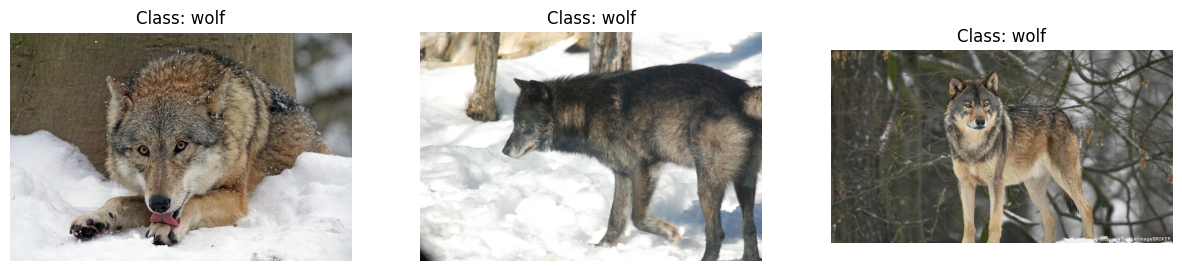

In [581]:
samples = df.sample(3)
# samples_without_background=df_without_background.sample(3)
# Plot the 3 images with their class labels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (idx, row) in enumerate(samples.iterrows()):
    img = mpimg.imread(row['image_path'])
    axes[i].imshow(img)
    axes[i].set_title(f"Class: {row['class']}")
    axes[i].axis('off')  # Hide axis

plt.show()


In [582]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# for i, (idx, row) in enumerate(samples_without_background.iterrows()):
#     img = mpimg.imread(row['image_path'])
#     axes[i].imshow(img)
#     axes[i].set_title(f"Class: {row['class']}")
#     axes[i].axis('off')  # Hide axis

# plt.show()

In [583]:
# import shutil

# # Path to the folder you want to delete
# folder_path = '/kaggle/working/data'

# # Delete the folder and all its contents
# shutil.rmtree(folder_path)

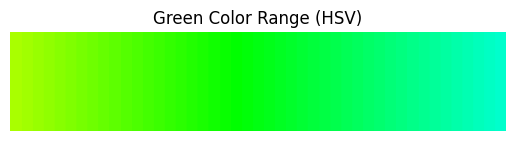

In [584]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the HSV range for green
lower_green = np.array([40, 40, 40], dtype=np.uint8)
upper_green = np.array([85, 255, 255], dtype=np.uint8)

# Create a gradient image in HSV within the green range
height, width = 100, 500  # Image size
gradient = np.zeros((height, width, 3), dtype=np.uint8)

# Fill with hue values from lower to upper green, with constant saturation and value
for i in range(width):
    hue = int(lower_green[0] + (upper_green[0] - lower_green[0]) * i / width)
    gradient[:, i, 0] = hue       # Set hue
    gradient[:, i, 1] = 255       # Set saturation to max for brightness
    gradient[:, i, 2] = 255       # Set value to max for brightness

# Convert to RGB for display
rgb_gradient = cv2.cvtColor(gradient, cv2.COLOR_HSV2RGB)

# Display the result
plt.imshow(rgb_gradient)
plt.title("Green Color Range (HSV)")
plt.axis('off')
plt.show()


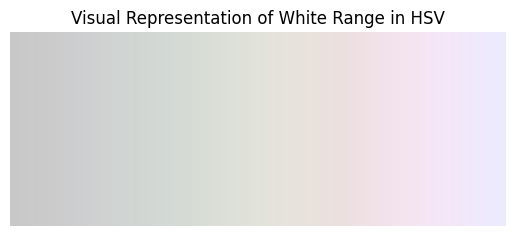

In [585]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_hsv_range(lower_bound, upper_bound):
    # Create a gradient image in HSV
    width, height = 256, 100
    gradient = np.zeros((height, width, 3), dtype=np.uint8)

    for x in range(width):
        # Interpolate between lower and upper bounds
        hue = lower_bound[0] + (upper_bound[0] - lower_bound[0]) * (x / width)
        saturation = lower_bound[1] + (upper_bound[1] - lower_bound[1]) * (x / width)
        value = lower_bound[2] + (upper_bound[2] - lower_bound[2]) * (x / width)

        gradient[:, x] = [hue, saturation, value]

    # Convert the HSV gradient to BGR for display
    gradient_bgr = cv2.cvtColor(gradient, cv2.COLOR_HSV2BGR)

    # Display the result using matplotlib
    plt.imshow(gradient_bgr)
    plt.axis('off')
    plt.title("Visual Representation of White Range in HSV")
    plt.show()

# Define the lower and upper bounds
lower_white = np.array([0, 0, 200])  # Lower boundary for white
upper_white = np.array([180, 20, 255])  # Upper boundary for white

# Visualize the range
visualize_hsv_range(lower_white, upper_white)


In [586]:
##### import cv2
import numpy as np
import matplotlib.pyplot as plt

# def remove_background(image_path):
#     # Read the image
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

#     # Create an initial mask (all zeroes)
#     mask = np.zeros(img.shape[:2], np.uint8)

#     # Create temporary arrays for grabCut (used internally)
#     bgd_model = np.zeros((1, 65), np.float64)
#     fgd_model = np.zeros((1, 65), np.float64)

#     # Define a rectangle around the object (adjust this for better results)
#     height, width = img.shape[:2]
#     rect = (10, 10, width - 10, height - 10)  # (x, y, w, h)

#     # Apply grabCut algorithm
#     cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

#     # Modify the mask to set sure foreground and sure background
#     mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

#     # Apply the mask on the image to extract the foreground
#     img_foreground = img * mask_2[:, :, np.newaxis]

#     # Create a white background and overlay the foreground on it
#     background = np.ones_like(img) * 255
#     result = np.where(img_foreground == 0, background, img_foreground)

#     return result

# def remove_background(img):
#     image = cv2.imread(img)

#     # Convert the image to HSV color space
#     hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     # Define the range for green color in HSV
#     lower_green = np.array([40, 40, 40])    # Lower boundary for green (Hue, Saturation, Value)
#     upper_green = np.array([85, 255, 255])  # Upper boundary for green

#     # Create a mask to select green areas
#     green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

#     # Change all green pixels to white
#     image[green_mask > 0] = [255, 255, 255]

    # Save or display the result
#     cv2.imwrite("output.jpg", image)
#     cv2.imshow("Result", image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     return image
def remove_background(img):
    # Read the image
    image = cv2.imread(img)

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for white color in HSV
    lower_white = np.array([0, 0, 200])  # Lower boundary for white (Hue, Saturation, Value)
    upper_white = np.array([150, 25, 255])  # Upper boundary for white
#     white_mask = cv2.inRange(image, (255, 255, 255), (255, 255, 255))
    # Create a mask to select white areas
    white_mask = cv2.inRange(hsv_image, lower_white, upper_white)

    # Change all white pixels to green (BGR format for green)
    image[white_mask > 0] = [0, 255, 0]  # Set to green

    
    return image
i=0
for image in data['image_path']:
#     image_path = "/kaggle/input/husky-vs-wolf/data/train/husky/husky_8.jpeg"
    image_path=image
#     output_husky_path='/kaggle/working/data/train/husky'
#     output_wolf_path='/kaggle/working/data/train/wolf'
#     os.makedirs(output_husky_path, exist_ok=True)
#     os.makedirs(output_wolf_path, exist_ok=True)
    
    
    if(data['class'][i]=='husky'):
#         result = remove_background(image_path)
          pass
#         print("husky")
#         cv2.imwrite(os.path.join(output_husky_path, image), result)
    else:
        pass
#         print("wolf")
#         cv2.imwrite(os.path.join(output_wolf_path, image), result)
    i=i+1
    # Plot the original and background-removed images side-by-side
#     fig, ax = plt.subplots(1, 2, figsize=(12, 6))
#     ax[0].imshow(cv2.imread(image_path)[:, :, ::-1])
#     ax[0].set_title("Original Image")
#     ax[0].axis('off')

#     ax[1].imshow(result)
#     ax[1].set_title("Image with Background Removed")
#     ax[1].axis('off')

#     plt.show()
print(i)


100


In [587]:
# Convert class labels to numeric (husky -> 0, wolf -> 1)
df['class'] = df['class'].apply(lambda x: 0 if x == 'husky' else 1)
df_without_background['class'] = df_without_background['class'].apply(lambda x: 0 if x == 'husky' else 1)
# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")


Train size: 80, Test size: 20


In [588]:
from PIL import Image
import numpy as np

class AnimalDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]

        # Load image and convert it to RGB
        image = Image.open(img_path).convert("RGB")
        if label == 1:
            print("Label found:", label)
            image = remove_background(img_path)  # This should return a numpy array

            # Convert numpy array to PIL Image
            if isinstance(image, np.ndarray):
                image = Image.fromarray(image)

        # Apply transformations (if any)
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)


In [589]:
from torchvision import transforms

class Replace255With0:
    def __call__(self, tensor):
        tensor[tensor == 1.0] = 0.0  # In PyTorch, 255 is scaled to 1.0
        return tensor
    
    
# Training transforms with more augmentation
train_transform_with_background = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(12),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#     transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_transform_without_background = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    Replace255With0(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Test transforms without augmentation
test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Datasets and DataLoaders
train_dataset = AnimalDataset(train_df, transform=train_transform_with_background)
# train_dataset_without_background = AnimalDataset(df_without_background, transform=train_transform_without_background)
test_dataset = AnimalDataset(test_df, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# train_loader_without_background = DataLoader(train_dataset_without_background, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Images shape: torch.Size([16, 3, 256, 256])
Labels: tensor([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])


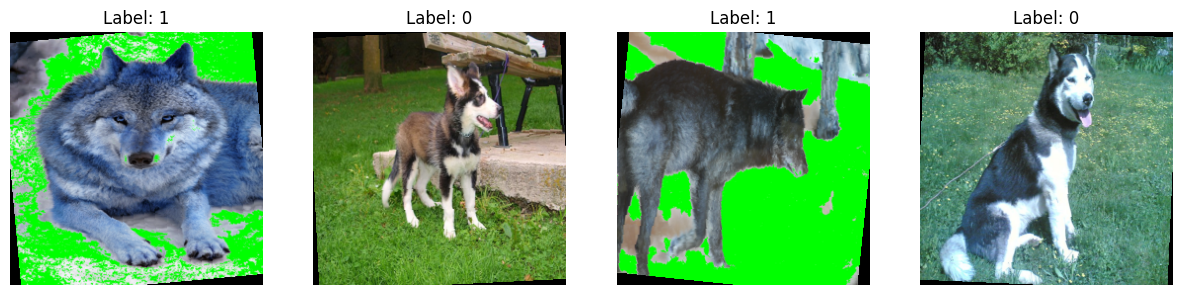

In [590]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader


# Function to display a batch of images and labels from the dataloader
def show_batch(loader):
    data_iter = iter(loader)  # Create an iterator
    images, labels = next(data_iter)  # Get the first batch
    print(f"Images shape: {images.shape}")  # E.g., torch.Size([4, 3, 256, 256])
    print(f"Labels: {labels}")  # Print the corresponding labels
    
    # Optionally display the images (requires matplotlib)
    import matplotlib.pyplot as plt
    grid_img = torch.permute(images, (0, 2, 3, 1))  # Move channels to last dimension
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    
    for i, ax in enumerate(axes):
        ax.imshow(grid_img[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    
    plt.show()

# Display a batch
show_batch(train_loader)
print(train_loader)


In [591]:
total_images = sum(len(batch[0]) for batch in train_loader)
print("Total images in train_loader:", total_images)

Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Total images in train_loader: 80


In [592]:
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        # Block 1: Conv -> BatchNorm -> ReLU -> Pool
        self.conv1 = nn.Conv2d(3, 128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)

        # Block 2: Conv -> BatchNorm -> ReLU -> Pool
        self.conv2 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Block 3: Conv -> BatchNorm -> ReLU -> Pool
        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)

        # Global Adaptive Pooling to avoid hardcoding dimensions
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layers
        self.fc1 = nn.Linear(32, 16)
#         self.dropout = nn.Dropout(0.5)  # Dropout to reduce overfitting
        self.fc2 = nn.Linear(16, 2)  # Binary classification (husky vs. wolf)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # Apply global adaptive pooling
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)  # Flatten

        # Fully connected layers with dropout
        x = F.relu(self.fc1(x))
#         x = self.dropout(x)
        x = self.fc2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedCNN().to(device)
print(model)


ImprovedCNN(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (adaptive_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=32, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=2, bias=True)
)


In [593]:
import torch.optim as optim
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#         nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

# model.apply(weights_init)
# class_weights = torch.tensor([0.5, 0.5]).to(device)

# # Use weighted CrossEntropyLoss
# criterion = nn.CrossEntropyLoss(weight=class_weights)
criterion = nn.CrossEntropyLoss()  # Binary classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [594]:
def train(model, train_loader, test_loader, criterion, optimizer, epochs=10, scheduler=None):
    model.train()  # Ensure model is in training mode

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Reset gradients

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Calculate accuracy
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total

        print(f"Epoch [{epoch + 1}/{epochs}], Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%")

        # Validation loop
        model.eval()  # Set model to evaluation mode
        test_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():  # No gradient computation in validation
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)

                # Forward pass
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                # Calculate accuracy
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        avg_test_loss = test_loss / len(test_loader)
        test_acc = 100 * correct / total

        print(f"Epoch [{epoch + 1}/{epochs}], Validation Loss: {avg_test_loss:.4f}, Validation Accuracy: {test_acc:.2f}%\n")

        # Step the scheduler if it is provided
        if scheduler:
            scheduler.step()

        model.train()  # Set model back to training mode for the next epoch
train(model, train_loader,test_loader, criterion, optimizer, epochs=10)

Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Epoch [1/10], Training Loss: 0.5781, Training Accuracy: 77.50%
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Epoch [1/10], Validation Loss: 0.6696, Validation Accuracy: 50.00%

Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1

In [595]:
# from itertools import zip_longest
# def train(model, train_loader, train_loader_without_background,criterion, optimizer, epochs=10):
#     model.train()
#     for epoch in range(epochs):
#         running_loss = 0.0
#         correct = 0
#         total = 0

#         for batch1, batch2 in zip_longest(train_loader, train_loader_without_background):
#             # Combine batches manually
# #             if batch1 is None or batch2 is None:
# #                 continue  # Skip this iteration if a batch is missing

#             (data1, labels1) = batch1
#             (data2, labels2) = batch2
#             images = torch.cat([data1, data2], dim=0)  # Concatenate along batch dimension
#             labels = torch.cat([labels1, labels2], dim=0)
#             images, labels = images.to(device), labels.to(device)
#             optimizer.zero_grad()

#             # Forward pass
#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             # Backward pass and optimization
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
            
#             # Calculate accuracy
#             _, preds = torch.max(outputs, 1)
#             correct += (preds == labels).sum().item()
#             total += labels.size(0)

#         epoch_loss = running_loss / len(train_loader)
#         epoch_acc = 100 * correct / total
#         print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

# train(model, train_loader, train_loader_without_background,criterion, optimizer, epochs=20)


In [596]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

evaluate(model, test_loader)


Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Label found: 1
Test Accuracy: 95.00%


In [597]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import matplotlib.pyplot as plt
# import numpy as np

# # Your ImprovedCNN definition remains unchanged

# # Hook to extract features
# class FeatureExtractor:
#     def _init_(self, model, layer_name):
#         self.model = model
#         self.layer_name = layer_name
#         self.features = None
        
#         # Register a forward hook to get the outputs of the specified layer
#         self.hook = getattr(self.model, self.layer_name).register_forward_hook(self.get_features)

#     def get_features(self, module, input, output):
#         self.features = output.detach()

#     def close(self):
#         self.hook.remove()
        
# # Custom transformation class
# # class Replace255With0:
# #     def _call_(self, tensor):
# #         tensor[tensor == 1.0] = 0.0  # Replace pixel value of 1.0 with 0.0
# #         return tensor

# # Define your transformations
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
# #     Replace255With0()
# ])        

#  # Function to load an image from the provided path
# def load_image_from_path(image_path):
#     if os.path.exists(image_path):
#         return Image.open(image_path).convert('RGB')  # Open and convert to RGB
#     else:
#         raise FileNotFoundError(f"The file at {image_path} was not found.")
        
# image_path = '/kaggle/input/pattern/data/train/husky/husky_13.jpeg'       
        
# # Create the model and move it to the device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = ImprovedCNN().to(device)

# # Initialize the feature extractor for the desired layer
# layer_name = 'conv3'
# feature_extractor = FeatureExtractor(model, layer_name)

# # Prepare your input image (ensure it's a tensor and properly sized)
# # your_image should be a NumPy array or a PyTorch tensor
# # Assuming your_image is a NumPy array with shape (H, W, C) and needs to be normalized

# image = load_image_from_path(image_path)

# # Apply the transformations
# your_image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

# # Forward pass to get feature maps
# _ = model(your_image_tensor)

# # Extract feature maps
# feature_maps = feature_extractor.features

# # Visualizing the feature maps
# # Normalize feature maps for better visualization
# feature_maps = feature_maps.squeeze(0)  # Remove the batch dimension
# num_features = feature_maps.size(0)
# square = int(np.ceil(num_features ** 0.5))  # Calculate grid size

# fig, axes = plt.subplots(square, square, figsize=(12, 12))
# for i in range(square * square):
#     if i < num_features:
#         ax = axes[i // square, i % square]
#         ax.imshow(feature_maps[i].cpu().numpy(), cmap='viridis')  # Move to CPU for plotting
#     else:
#         axes[i // square, i % square].axis('off')  # Hide empty subplots
# plt.show()

# # Close the hook
# feature_extractor.close()

Prediction: Wolf


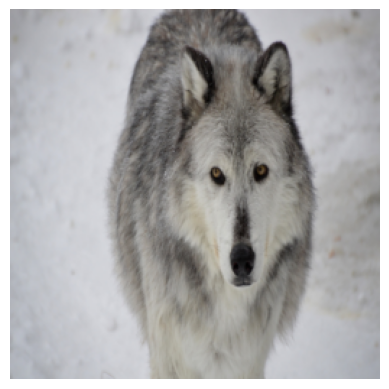

In [615]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load a test image
test = '/kaggle/input/husky-vs-wolf/data/train/wolf/wolf_49.jpeg'

# Define the test transformation
test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # Uncomment normalization if it was applied during training
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Open the image and apply transformations
image = Image.open(test).convert("RGB")
transformed_image = test_transform(image)

# Add a batch dimension to the image tensor
input_image = transformed_image.unsqueeze(0).to(device)  # Shape: [1, 3, 256, 256]

# Forward pass through the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation for inference
    outputs = model(input_image)
    _, preds = torch.max(outputs, 1)

# Display the prediction
if preds.item() == 0:
    print('Prediction: Husky')
else:
    print('Prediction: Wolf')

# Convert the tensor back to a NumPy array for display
image_np = transformed_image.permute(1, 2, 0).numpy()  # [H, W, C]

# Plot the image
plt.imshow(image_np)
plt.axis('off')  # Turn off axis
plt.show()


In [599]:
import torch

# Assuming your model is called 'model'
torch.save(model.state_dict(), '/kaggle/working/model1.pth')


In [600]:
from IPython.display import FileLink

# Assuming the model is saved as '/kaggle/working/model.pth'
display(FileLink('/kaggle/working/model1.pth'))


/kaggle/working/model1.pth